<a href="https://colab.research.google.com/github/dariemoldovan/majority-voting-reviews-sentiment/blob/main/RatingReliability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install krippendorff

In [ ]:
import pandas as pd
import krippendorff

# Load the CSV file

#df = pd.read_csv('/content/drive/MyDrive/Bert/medium_flipkart_curated_training.csv')
#df = pd.read_csv('/content/drive/MyDrive/Bert/large_flipkart_curated_training.csv')
#df = pd.read_csv('/content/drive/MyDrive/Bert/small_flipkart_curated_training.csv')
#df = pd.read_csv('/content/drive/MyDrive/Bert/flipkart_all_sent3.csv')
df = pd.read_csv('/content/drive/MyDrive/Bert/flipkart_after_aggregation.csv')
# Convert categorical sentiment values to numerical values (if needed)
# For example: Positive = 2, Neutral = 1, Negative = 0
sentiment_mapping = {'positive': 2, 'neutral/mixed': 1, 'negative': 0}
df['AWS'] = df['AWS'].map(sentiment_mapping)
df['IBM'] = df['IBM'].map(sentiment_mapping)
df['VADER'] = df['VADER'].map(sentiment_mapping)
df['GOOG'] = df['GOOG'].map(sentiment_mapping)
df['MSFT'] = df['MSFT'].map(sentiment_mapping)
#df['Sentiment'] = df['Sentiment'].map(sentiment_mapping )


# Prepare the data for Krippendorff's Alpha
ratings = df[['AWS', 'IBM', 'GOOG', 'MSFT','VADER']].values.T  # Transpose for correct format

# Calculate Krippendorff's Alpha for ordinal data
alpha = krippendorff.alpha(reliability_data=ratings, level_of_measurement='ordinal')

print(f"Krippendorff's Alpha: {alpha}")


Krippendorff's Alpha: 0.7287685275061186


In [ ]:
df

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ID,Product name,Price,Rate,Title,...,AWS,GNLP,IBM,MSFT,VSC,Rescaled Rating,Sentiment difference,VADER,GOOG,Sentiment
0,0,107091,107091,107091,107091,109114,Google Home Mini with Google Assistant Smart S...,4998,5,Simply awesome,...,2,0.930,2,NaN,0.4215,1.0,0.0,2,2,positive
1,2,37823,37823,37823,37823,37830,"Canon EOS 3000D DSLR Camera 1 Camera Body, 18 ...",30999,5,Worth every penny,...,2,0.953,2,NaN,0.4404,1.0,0.0,2,2,positive
2,3,43812,43812,43812,43812,45824,UPC Upgraded Hands Free Squeeze Microfiber Fla...,1260,5,Brilliant,...,2,0.893,2,NaN,0.6369,1.0,0.0,2,2,positive
3,4,11237,11237,11237,11237,11237,Hindware 45 L Room/Personal Air Cooler??(Bla...,6299,3,Fair,...,2,-0.109,1,neutral/mixed,0.0000,0.0,0.0,1,1,neutral/mixed
4,5,73749,73749,73749,73749,75766,Prestige Delight PRWO 1.5 (1.5L OPEN TYPE) Ele...,2295,4,Nice product,...,2,0.953,2,NaN,0.6124,0.5,-0.5,2,2,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44487,49994,86860,86860,86860,86860,88879,"VICTORY Professional Wrist Wrap Band , Wrist S...",109,4,Really Nice,...,2,0.936,2,NaN,0.6590,0.5,-0.5,2,2,positive
44488,49995,40812,40812,40812,40812,42823,RBGIIT Latex Rubber Pink Special Dish Kitchen ...,169,1,Horrible,...,1,0.698,0,NaN,0.0000,-1.0,-1.0,1,2,neutral/mixed
44489,49996,94940,94940,94940,94940,96962,Inalsa Inox 1000 1000 W Food Processor??(Sil...,9050,5,Terrific,...,2,0.717,2,NaN,0.8555,1.0,0.0,2,2,positive
44490,49997,21470,21470,21470,21470,21476,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,3,Just okay,...,2,0.898,2,NaN,0.4404,0.0,-1.0,2,2,positive


In [ ]:
import pandas as pd
import krippendorff

# Load the CSV file
#df = pd.read_csv('/content/drive/MyDrive/Bert/medium_flipkart_curated_training.csv')
#df = pd.read_csv('/content/drive/MyDrive/Bert/large_flipkart_curated_training.csv')
df = pd.read_csv('/content/drive/MyDrive/Bert/small_flipkart_curated_training.csv')

# Convert categorical sentiment values to numerical values (if needed)
# For example: Positive = 2, Neutral = 1, Negative = 0
sentiment_mapping = {'positive': 2, 'neutral/mixed': 1, 'negative': 0}
df['AWS'] = df['AWS'].map(sentiment_mapping)
df['IBM'] = df['IBM'].map(sentiment_mapping)
df['VADER'] = df['VADER'].map(sentiment_mapping)
df['GOOG'] = df['GOOG'].map(sentiment_mapping)
df['MSFT'] = df['MSFT'].map(sentiment_mapping)
df['Sentiment'] = df['Sentiment'].map(sentiment_mapping)

# Function to calculate Krippendorff's Alpha between a tool and the aggregated Sentiment
def calculate_alpha(tool_col, sentiment_col):
    ratings = [df[tool_col], df[sentiment_col]]  # Pair the tool with Sentiment
    alpha = krippendorff.alpha(reliability_data=ratings, level_of_measurement='nominal')
    print(f"Krippendorff's Alpha between {tool_col} and {sentiment_col}: {alpha}")

# Calculate alpha for each tool
calculate_alpha('AWS', 'Sentiment')
calculate_alpha('IBM', 'Sentiment')
calculate_alpha('VADER', 'Sentiment')
calculate_alpha('GOOG', 'Sentiment')
calculate_alpha('MSFT', 'Sentiment')

Krippendorff's Alpha between AWS and Sentiment: 0.781534936254305
Krippendorff's Alpha between IBM and Sentiment: 0.6961580511285089
Krippendorff's Alpha between VADER and Sentiment: 0.7621995959073088
Krippendorff's Alpha between GOOG and Sentiment: 0.7968001185667992
Krippendorff's Alpha between MSFT and Sentiment: 0.7998112597732661


In [ ]:
import pandas as pd
import krippendorff

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/Bert/flipkart_after_aggregation.csv')

# Convert categorical sentiment values to numerical values (if needed)
sentiment_mapping = {'positive': 2, 'neutral/mixed': 1, 'negative': 0}
df['AWS'] = df['AWS'].map(sentiment_mapping)
df['IBM'] = df['IBM'].map(sentiment_mapping)
df['VADER'] = df['VADER'].map(sentiment_mapping)
df['GOOG'] = df['GOOG'].map(sentiment_mapping)
df['MSFT'] = df['MSFT'].map(sentiment_mapping)
df['Sentiment'] = df['Sentiment'].map(sentiment_mapping)

# List of tools to calculate Krippendorff's Alpha
tools = ['AWS', 'IBM', 'VADER', 'GOOG', 'MSFT']

# Initialize a DataFrame to store the results
alpha_matrix = pd.DataFrame(index=tools, columns=tools)

# Function to calculate Krippendorff's Alpha
def calculate_alpha(df, tools):
    # Store the alpha values for tool-to-Sentiment comparison
    alpha_results = []

    for tool1 in tools:
        # Calculate Krippendorff's Alpha with Sentiment for each tool
        ratings = [df[tool1], df['Sentiment']]
        alpha_sentiment = krippendorff.alpha(reliability_data=ratings, level_of_measurement='ordinal')
        alpha_results.append(alpha_sentiment)

        # Calculate Krippendorff's Alpha for tool-to-tool comparisons
        for tool2 in tools:
            if tool1 == tool2:
                alpha_matrix.loc[tool1, tool2] = None  # No need to calculate self-pair
            else:
                ratings_pair = [df[tool1], df[tool2]]
                alpha_matrix.loc[tool1, tool2] = krippendorff.alpha(reliability_data=ratings_pair, level_of_measurement='ordinal')

    # Add alpha results as a column in alpha_matrix
    alpha_matrix['Aggregated Sentiment'] = alpha_results

    # Mask the lower triangle of the matrix (below the diagonal)
    for i in range(len(tools)):
        for j in range(i):
            alpha_matrix.iloc[i, j] = None

    return alpha_matrix

# Call the function to calculate the Krippendorff's Alpha values
alpha_matrix = calculate_alpha(df, tools)

# Display the results
print("Krippendorff's Alpha Matrix (Tool-to-Tool and Tool-to-Sentiment comparisons):")
print(alpha_matrix)


Krippendorff's Alpha Matrix (Tool-to-Tool and Tool-to-Sentiment comparisons):
        AWS       IBM     VADER      GOOG      MSFT  Aggregated Sentiment
AWS    None  0.680897  0.726383  0.776168  0.779756              0.839878
IBM    None      None  0.704202  0.727163  0.687933              0.806774
VADER  None      None      None  0.711519  0.740846              0.844333
GOOG   None      None      None      None  0.756158              0.865623
MSFT   None      None      None      None      None              0.881029


<ipython-input-54-180585776c3c>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  alpha_matrix = alpha_matrix.applymap(lambda x: np.nan if x is None else x)


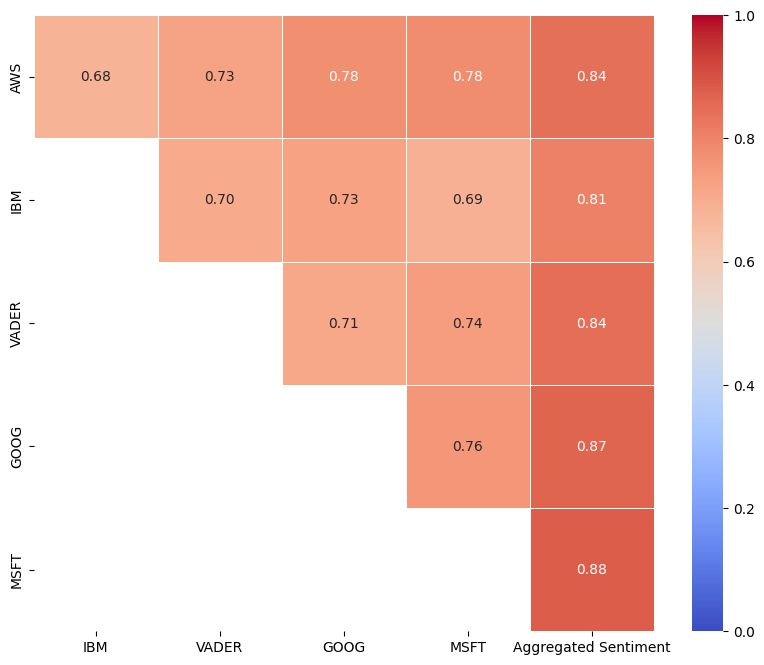

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Replace None with NaN in the alpha_matrix
alpha_matrix = alpha_matrix.applymap(lambda x: np.nan if x is None else x)

# Remove the first column (tool vs tool comparisons) but keep the 'Alpha_with_Sentiment' column
alpha_matrix = alpha_matrix.drop(columns=[tools[0]])

# Visualizing the Krippendorff's Alpha matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(alpha_matrix, annot=True, cmap="coolwarm", cbar=True, vmin=0, vmax=1, fmt=".2f", linewidths=0.5)
#plt.title("Krippendorff's Alpha Heatmap (Tool-to-Tool and Tool-to-Sentiment Comparisons)")
plt.show()




<ipython-input-55-93d7fd749f48>:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  alpha_matrix = alpha_matrix.applymap(lambda x: np.nan if x is None else x)


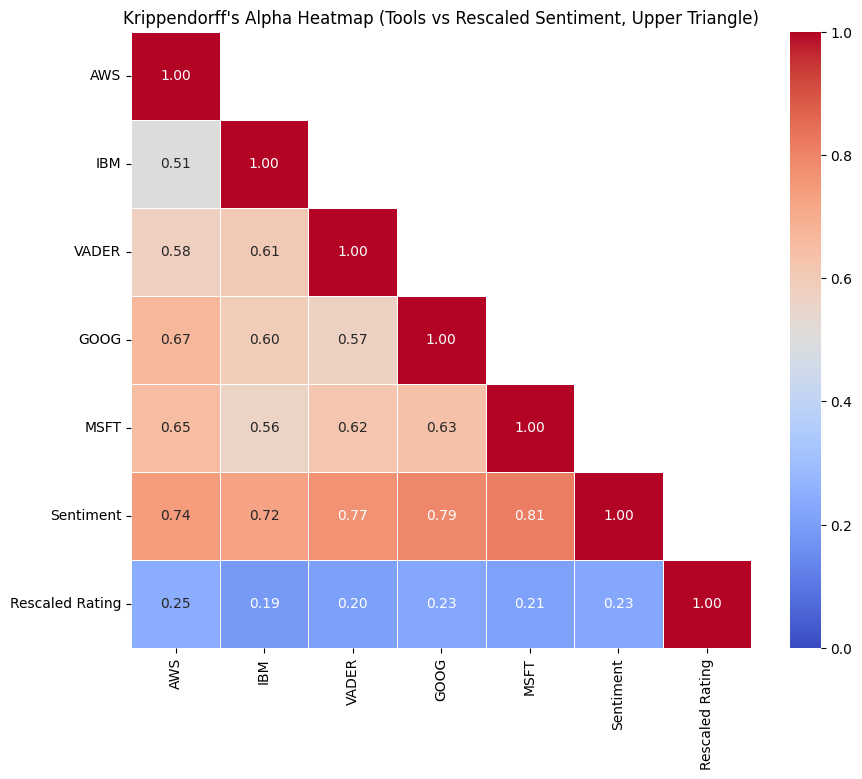

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import krippendorff

# Load the DataFrame (assuming it's already loaded in df)
# df = pd.read_csv('your_file.csv')

# Mapping to rescale the values
rescale_mapping = {2: 1, 1: 0, 0: -1}

# Apply the mapping to rescale the values in the relevant columns
columns_to_rescale = ['AWS', 'IBM', 'VADER', 'GOOG', 'MSFT', 'Sentiment']  # Include the Sentiment column too

for col in columns_to_rescale:
    df[col] = df[col].map(rescale_mapping)

# Adding 'Rescaled Rating' as a new column in the DataFrame
# Assume that 'Rescaled Rating' is just another column in your df (you can calculate it if needed)
# For now, we'll assume it's already present
# If needed, you can calculate the Rescaled Rating like this:
#df['Rescaled Rating'] = df['Sentiment']  # Or define it differently

# Define the tools including the 'Rescaled Rating' column
tools = ['AWS', 'IBM', 'VADER', 'GOOG', 'MSFT', 'Sentiment', 'Rescaled Rating']

# Initialize the alpha matrix
alpha_matrix = pd.DataFrame(index=tools, columns=tools)

# Function to calculate Krippendorff's Alpha between two columns
def calculate_alpha():
    for i, tool1 in enumerate(tools):
        for j, tool2 in enumerate(tools):
            if i <= j:  # Upper triangle (symmetrical matrix)
                ratings = [df[tool1], df[tool2]]
                alpha = krippendorff.alpha(reliability_data=ratings, level_of_measurement='nominal')
                alpha_matrix.loc[tool1, tool2] = alpha
                alpha_matrix.loc[tool2, tool1] = alpha  # Make it symmetric

# Calculate alpha values
calculate_alpha()

# Replace None with NaN for better visualization
alpha_matrix = alpha_matrix.applymap(lambda x: np.nan if x is None else x)

# Mask the lower triangle (including the diagonal)
mask = np.triu(np.ones_like(alpha_matrix, dtype=bool), k=1)

# Visualizing the Krippendorff's Alpha matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(alpha_matrix, annot=True, cmap="coolwarm", cbar=True, vmin=0, vmax=1, fmt=".2f",
            linewidths=0.5, mask=mask)
plt.title("Krippendorff's Alpha Heatmap (Tools vs Rescaled Sentiment, Upper Triangle)")
plt.show()


In [ ]:
df

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ID,Product name,Price,Rate,Title,Summary,AWS,GNLP,IBM,MSFT,VSC,Rescaled Rating,Sentiment difference,GOOG,VADER,Sentiment
0,0,0,0,0,0,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Simply awesome,'s really worth every single penny . work like...,2,0.336,2,1,0.9827,1.0,0.664,2,2,2.0
1,1,1,1,1,1,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,4,Worth the money . Desert Cooler live up to the...,bought crompton ozone 75 desert air cooler mon...,2,0.334,2,2,0.9300,0.5,0.166,2,2,2.0
2,2,2,2,2,2,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Worth every penny,great packaging seller . important point trans...,2,0.435,2,2,0.9589,1.0,0.565,2,2,2.0
3,3,3,3,3,3,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,5,Fabulous!,delivery delayed two day except everything qui...,1,0.175,2,2,0.9524,1.0,0.825,2,2,2.0
4,4,4,4,4,4,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499,4,Nice product,good cooler crompton . height cooler 3ft 10 in...,2,0.499,2,2,0.9681,0.5,0.001,2,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21438,21438,21465,21465,21465,21471,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,1,Horrible,colour faded away one wash,0,-0.919,1,0,0.0000,-1.0,-0.081,0,1,0.0
21439,21439,21466,21466,21466,21472,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,5,Highly recommended,amazing product ! loved,2,0.924,2,2,0.8398,1.0,0.076,2,2,2.0
21440,21440,21467,21467,21467,21473,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,4,Nice product,like product .,2,0.935,1,2,0.3612,0.5,-0.435,2,2,2.0
21441,21441,21468,21468,21468,21474,CLOTHOLOGY 144 TC Cotton Double Printed Flat B...,329,5,Highly recommended,good . color fade breach also .,2,0.056,2,2,0.4404,1.0,0.944,1,2,2.0


In [ ]:

sentiment_columns = ['AWS', 'IBM', 'VADER', 'GOOG','MSFT']
df = df[sentiment_columns]


In [ ]:
import krippendorff
import numpy as np

# Calculate class frequencies
class_counts = df.apply(pd.Series.value_counts).sum(axis=1)
class_frequencies = class_counts / class_counts.sum()

# Inverse frequencies to give higher weight to less frequent classes
class_weights = 1 / class_frequencies

# Function to compute weighted disagreement matrix
def weighted_disagreement_matrix(ratings, class_weights):
    n_raters, n_cases = ratings.shape
    disagreement_matrix = np.zeros((n_cases, n_cases))

    # Iterate over every pair of ratings
    for i in range(n_cases):
        for j in range(i, n_cases):  # Compare only upper triangle to avoid double counting
            # Compute disagreement between the two raters
            disagreement = np.sum(ratings[:, i] != ratings[:, j])

            # Apply class weights to disagreements (sum of weights from both cases)
            weighted_disagreement = class_weights[ratings[:, i]] + class_weights[ratings[:, j]]

            # Store the weighted disagreement
            disagreement_matrix[i, j] = np.sum(weighted_disagreement * disagreement)
            disagreement_matrix[j, i] = disagreement_matrix[i, j]  # Mirror the matrix

    return disagreement_matrix

# Transpose ratings to match shape for krippendorff alpha
ratings = df.values.T

# Compute the weighted disagreement matrix
disagreement_matrix = weighted_disagreement_matrix(ratings, class_weights)

# Calculate alpha with the weighted disagreement matrix
alpha_weighted = krippendorff.alpha(reliability_data=ratings, level_of_measurement='nominal')

print(f"Weighted Krippendorff's Alpha: {alpha_weighted}")


TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
import pandas as pd
import numpy as np
import krippendorff
import random

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/Bert/medium_flipkart_curated_training.csv')

# Convert categorical sentiment values to numerical values (if needed)
sentiment_mapping = {'positive': 2, 'neutral/mixed': 1, 'negative': 0}
df['AWS'] = df['AWS'].map(sentiment_mapping)
df['IBM'] = df['IBM'].map(sentiment_mapping)
df['VADER'] = df['VADER'].map(sentiment_mapping)
df['GOOG'] = df['GOOG'].map(sentiment_mapping)

# Define a function to compute kRR by randomly selecting k columns and calculating agreement
def compute_krr(df, k, num_iterations=1):
    cols = ['AWS', 'IBM', 'VADER', 'GOOG']
    krr_scores = []

    for _ in range(num_iterations):
        # Randomly select k columns
        selected_cols = random.sample(cols, k)

        # Prepare the data for Krippendorff's Alpha
        ratings = df[selected_cols].values.T  # Transpose for correct format

        # Calculate Krippendorff's Alpha for ordinal data (since the sentiment is ordered)
        alpha = krippendorff.alpha(reliability_data=ratings, level_of_measurement='ordinal')

        krr_scores.append(alpha)

    # Return the average kRR score across iterations
    return np.mean(krr_scores)

# Run the kRR process for k=2, k=3, and k=4, each with 100 iterations
k_values = [2, 3, 4]
results = {}

for k in k_values:
    krr_result = compute_krr(df, k=k, num_iterations=100)
    results[k] = krr_result
    print(f"Average kRR for k={k}: {krr_result}")

# Show the results for each k
print("kRR Results:", results)

Average kRR for k=2: 0.754049167280943
Average kRR for k=3: 0.7573916153921904
Average kRR for k=4: 0.7585856172877454
kRR Results: {2: 0.754049167280943, 3: 0.7573916153921904, 4: 0.7585856172877454}


In [ ]:
import pandas as pd
import numpy as np
import krippendorff
import random

# Load the CSV file
df = pd.read_csv('/content/medium_flipkart_curated_training.csv')

# Convert categorical sentiment values to numerical values (if needed)
sentiment_mapping = {'positive': 2, 'neutral/mixed': 1, 'negative': 0}
df['AWS'] = df['AWS'].map(sentiment_mapping)
df['IBM'] = df['IBM'].map(sentiment_mapping)
df['VADER'] = df['VADER'].map(sentiment_mapping)
df['GOOG'] = df['GOOG'].map(sentiment_mapping)

# Define a function to compute kRR by comparing the average of k random columns with the average of all columns
def compute_krr(df, k, num_iterations=100):
    cols = ['AWS', 'IBM', 'VADER', 'GOOG']
    krr_scores = []

    # Compute the average of all columns once (constant across iterations)
    df['All_Average'] = df[cols].mean(axis=1)

    for _ in range(num_iterations):
        # Randomly select k columns
        selected_cols = random.sample(cols, k)

        # Compute the average of the selected k columns
        df['K_Average'] = df[selected_cols].mean(axis=1)

        # Prepare the data for Krippendorff's Alpha
        ratings = [df['K_Average'].values, df['All_Average'].values]

        # Calculate Krippendorff's Alpha for interval data (since we're comparing averages)
        alpha = krippendorff.alpha(reliability_data=ratings, level_of_measurement='interval')

        krr_scores.append(alpha)

    # Return the average kRR score across iterations
    return np.mean(krr_scores)

# Run the kRR process for k=2, k=3, and k=4, each with 100 iterations
k_values = [2, 3, 4]
results = {}

for k in k_values:
    krr_result = compute_krr(df, k=k, num_iterations=100)
    results[k] = krr_result
    print(f"Average kRR for k={k}: {krr_result}")

# Show the results for each k
print("kRR Results:", results)


Average kRR for k=2: 0.9741853088014965
Average kRR for k=3: 0.9911761397750412
Average kRR for k=4: 1.0
kRR Results: {2: 0.9741853088014965, 3: 0.9911761397750412, 4: 1.0}


/content/drive/MyDrive/Bert/flipkart_all_sent3.csv

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# Function to compute Scott's Pi for two raters
def scotts_pi(rater1, rater2, labels):
    # Create a contingency table (confusion matrix)
    contingency_table = confusion_matrix(rater1, rater2, labels=labels)

    # Total number of items
    total = np.sum(contingency_table)

    # Calculate observed agreement
    observed_agreement = np.trace(contingency_table) / total

    # Calculate expected agreement
    row_totals = np.sum(contingency_table, axis=1)
    col_totals = np.sum(contingency_table, axis=0)
    expected_agreement = np.sum(row_totals * col_totals) / (total ** 2)

    # Calculate Scott's Pi
    pi = (observed_agreement - expected_agreement) / (1 - expected_agreement)

    return pi

# Load the CSV file into a DataFrame
csv_file_path = '/content/drive/MyDrive/Bert/flipkart_after_aggregation.csv'
df = pd.read_csv(csv_file_path)

# Ensure the columns are correctly named in the CSV file
# Example column names: 'AWS', 'IBM', 'VADER', 'GOOG', 'Sentiment'
columns = ['AWS', 'IBM', 'VADER', 'GOOG', 'Sentiment']

# Define the sentiment labels (categories)
labels = ['positive', 'neutral/mixed', 'negative']

# Extract the relevant columns from the CSV
raters = {
    'AWS': df['AWS'].tolist(),
    'IBM': df['IBM'].tolist(),
    'VADER': df['VADER'].tolist(),
    'MSFT': df['MSFT'].tolist(),
    'GOOG': df['GOOG'].tolist(),
    'Aggregated': df['Sentiment'].tolist()
}

# Create an empty DataFrame to store the Pi scores
pi_matrix = pd.DataFrame(index=raters.keys(), columns=raters.keys())

# Calculate Scott's Pi for each pair of raters
for rater1_name, rater1 in raters.items():
    for rater2_name, rater2 in raters.items():
        if rater1_name != rater2_name:
            pi_matrix.loc[rater1_name, rater2_name] = scotts_pi(rater1, rater2, labels)
        else:
            pi_matrix.loc[rater1_name, rater2_name] = np.nan  # No comparison of rater with itself

# Print the resulting matrix of Scott's Pi scores
print(pi_matrix)

                 AWS       IBM     VADER      MSFT      GOOG Aggregated
AWS              NaN  0.507615     0.579  0.652588  0.669834   0.745122
IBM         0.507615       NaN  0.607398  0.561649  0.595745   0.724478
VADER          0.579  0.607398       NaN  0.618146  0.568142   0.768236
MSFT        0.652588  0.561649  0.618146       NaN  0.633242   0.814199
GOOG        0.669834  0.595745  0.568142  0.633242       NaN   0.792016
Aggregated  0.745122  0.724478  0.768236  0.814199  0.792016        NaN
